In [1]:
#import libs 
import numpy as np
from random import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Number of Slot Machines
n = 10
# Probability Factor to select Exploration Implementation
# eps below 0.1 will explore
# eps above will exploite 
eps = 0.1

In [23]:
# assign static probability to slot machines
arms = np.random.rand(n)
arms

array([ 0.88139646,  0.89839641,  0.60630193,  0.38681185,  0.17009909,
        0.3006374 ,  0.75720582,  0.03925704,  0.58731653,  0.58979883])

In [74]:
#initialising action value array for the slot machine. 
action_value = np.ones(n)
#counts k for our equation, it shows how often we have chosen action for the slot machine (i)
number_of_games = np.zeros(n)

In [5]:
# Reward function for Game(i) and slot_machine(i)
def slot_machine_reward(probability_of_slot_machine):
    """
    Takes the Reward of the slot machine and iterates 10 times to compare with random value,
    if random value is smaller then from the slot machine we increment by 1
    We iterate 10 times, because we have a maximum output value of $10
    """
    reward = 0
    for i in range(10):
        if random() <= probability_of_slot_machine:
            reward += 1
    return reward

In [19]:
#test of slot_machine_reward(probability_of_slot_machine):
slot_machine_reward(arms[2])

4

In [46]:
# Calculating Greedy Method - Selecting the Best known Slot Machine
def best_slot_machine(slot_machines):
    """
    Input Array of mean expected reward values of known slot machines
    and return the index of the highest value
    """
    return np.argmax(slot_machines)

In [47]:
def calculate_new_average_reward(index):
    """
    Calculating new expected mean reward
    """
    #Calculate the current reward
    reward = slot_machine_reward(arms[index])
    # increment the number of games for slot machine [i]
    number_of_games[index] += 1
    # assign that value to total number of played games 
    k = number_of_games[index]
    #getting old average value
    old_average = action_value[index]
    #calculating new expected mean reward and overide the action value
    action_value[index] = old_average + (1/k)*(reward - old_average)   

1

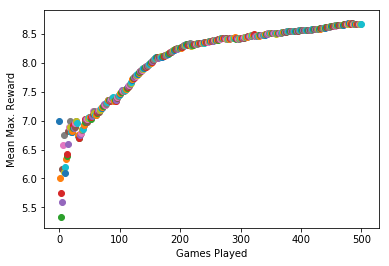

In [75]:
# Drawing the Results of Mean Rewards
plt.xlabel("Games Played")
plt.ylabel("Mean Max. Reward")

for i in range(500):
    # Exploitation Method
    if random() > eps:
        #Select the best slot machine
        index = best_slot_machine(action_value)
        calculate_new_average_reward(index)
    # Exploration Method
    else:
        # select random slot machine
        index = np.where(np.random.choice(arms) == arms)[0][0]
        calculate_new_average_reward(index)      
        
    running_avr = np.average(action_value, weights=np.array([number_of_games[j]/np.sum(number_of_games) for j in range(n)]))
    #plt.scatter(i, action_value[best_slot_machine(action_value)] )
    plt.scatter(i, running_avr)
best_slot_machine(action_value)

In [76]:
best_slot_machine(action_value)

1